In [15]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator as Imgen
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import os.path
from tqdm.notebook import tqdm
import cv2



In [16]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:

import opendatasets as od
od.download("https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri")


Skipping, found downloaded files in "./brain-tumor-classification-mri" (use force=True to force download)


In [18]:
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
X_train = []
y_train  = []
X_test = []
y_test = []
image_size=128

In [19]:
for label in labels:
    trainPath = os.path.join(r'/content/brain-tumor-classification-mri/Training',label)
    for file in tqdm(os.listdir(trainPath)):
        image = cv2.imread(os.path.join(trainPath, file))
        image = cv2.resize(image, (image_size, image_size))
        X_train.append(image)
        y_train.append(label)
    
    testPath = os.path.join(r'/content/brain-tumor-classification-mri/Testing',label)
    for file in tqdm(os.listdir(testPath)):
        image = cv2.imread(os.path.join(testPath, file))
        image = cv2.resize(image, (image_size, image_size))
        X_test.append(image)
        y_test.append(label)
    
X_train = np.array(X_train)
X_test = np.array(X_test)


  0%|          | 0/826 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

  0%|          | 0/395 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/827 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


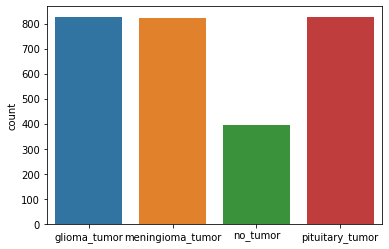

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(y_train)

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [22]:
# one hot encoding
Y_train = []
for i in y_train:
    Y_train.append(labels.index(i))
y_train = Y_train

y_train = tensorflow.keras.utils.to_categorical(y_train)

Y_test = []
for i in y_test:
    Y_test.append(labels.index(i))
y_test = Y_test

y_test = tensorflow.keras.utils.to_categorical(y_test)

In [23]:
datagen = Imgen(
featurewise_center=False,
samplewise_center=False,
featurewise_std_normalization=False,
samplewise_std_normalization=False,
zca_whitening=False,
rotation_range=10,
zoom_range=0.2,
width_shift_range=0.2,
horizontal_flip=False,
vertical_flip=False)

datagen.fit(X_train)

In [24]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [25]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten




model = models.Sequential([
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    
    
  
 
     
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.30),
    
 
  
      
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
   
     
    #layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
     Dropout(0.30),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    #layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])


In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


model.compile(optimizer= Adam(learning_rate= 1e-3), loss= 'binary_crossentropy', metrics= ['accuracy'])

In [28]:
batch_size = 20
train_steps = len(X_train) // batch_size
epochs = 25


In [29]:
history = model.fit(X_train, y_train,validation_split=0.10 ,batch_size=batch_size ,verbose=1,epochs=epochs)

Epoch 1/25
117/117 [==============================] - 18s 34ms/step - loss: 0.4862 - accuracy: 0.4918 - val_loss: 0.4367 - val_accuracy: 0.5830
Epoch 2/25
117/117 [==============================] - 3s 27ms/step - loss: 0.3660 - accuracy: 0.6670 - val_loss: 0.3584 - val_accuracy: 0.6332
Epoch 3/25
117/117 [==============================] - 3s 27ms/step - loss: 0.2913 - accuracy: 0.7418 - val_loss: 0.3175 - val_accuracy: 0.7143
Epoch 4/25
117/117 [==============================] - 3s 27ms/step - loss: 0.2485 - accuracy: 0.8003 - val_loss: 0.2475 - val_accuracy: 0.7992
Epoch 5/25
117/117 [==============================] - 3s 27ms/step - loss: 0.2011 - accuracy: 0.8451 - val_loss: 0.2018 - val_accuracy: 0.8340
Epoch 6/25
117/117 [==============================] - 3s 27ms/step - loss: 0.1744 - accuracy: 0.8666 - val_loss: 0.2126 - val_accuracy: 0.8378
Epoch 7/25
117/117 [==============================] - 3s 27ms/step - loss: 0.1347 - accuracy: 0.9010 - val_loss: 0.1687 - val_accuracy: 0.876

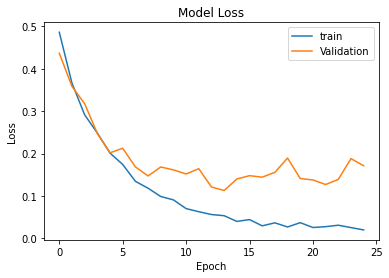

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'Validation'], loc='upper right')
plt.show()

<Figure size 432x288 with 0 Axes>

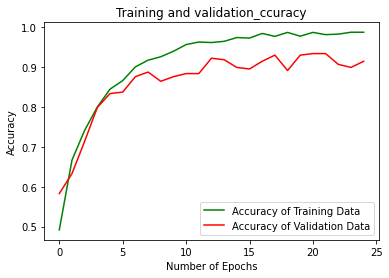

<Figure size 432x288 with 0 Axes>

In [31]:
epochs = range(len(history.history['accuracy']))

plt.plot(epochs, history.history['accuracy'], 'g', label='Accuracy of Training Data')
plt.plot(epochs, history.history['val_accuracy'], 'r', label='Accuracy of Validation Data')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation_ccuracy')
plt.legend(loc=0)
plt.figure()


In [32]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import metrics
predictions = model.predict(X_test, batch_size= batch_size)
predictions = np.argmax(predictions, axis= 1)
actuals = np.argmax(y_test, axis= 1)

testing_accuracy = metrics.accuracy_score(actuals, predictions)
testing_accuracy



0.9581881533101045

Text(42.0, 0.5, 'Truth')

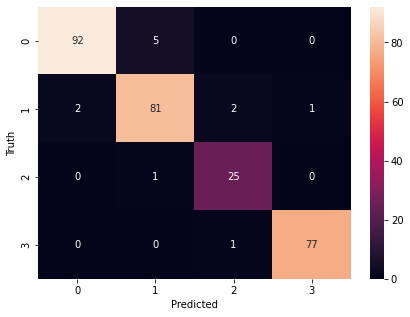

In [33]:
#cm in visual
cm = confusion_matrix(actuals, predictions)
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [34]:
print(classification_report(actuals, predictions, target_names= labels))


                  precision    recall  f1-score   support

    glioma_tumor       0.98      0.95      0.96        97
meningioma_tumor       0.93      0.94      0.94        86
        no_tumor       0.89      0.96      0.93        26
 pituitary_tumor       0.99      0.99      0.99        78

        accuracy                           0.96       287
       macro avg       0.95      0.96      0.95       287
    weighted avg       0.96      0.96      0.96       287



In [35]:
def names(number):
    if number==0:
        return 'glioma_tumor'

    
    if number==1:
        return 'meningioma_tumor'
    
    if number==2:
        return 'no_tumor'
    if number==3:
        return 'pituitary_tumor'
    
    
    else:
        return 'inappropriate data'
    

#labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

 This Is meningioma_tumor


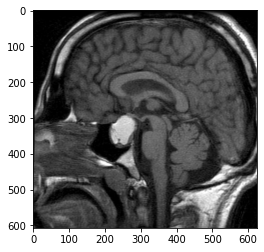

In [36]:

from matplotlib.pyplot import imshow
from PIL import Image
img = Image.open(r"/content/brain-tumor-classification-mri/Testing/pituitary_tumor/image(41).jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
pred= model.predict_on_batch(x)
classification = np.where(pred== np.amax(pred))[1][0]
imshow(img)
print(' This Is ' + names(classification))